In [1]:
import gzip
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import defaultdict

In [2]:
def parseData(fname):
    with gzip.open(fname, 'rt') as f:
        for l in f:
            yield eval(l)


allRatings = list(parseData("ratebeer.json.gz"))

In [3]:
print(type(allRatings[10]))
allRatings[10]

<class 'dict'>


{'beer/name': 'John Harvards Belgian Tripel',
 'beer/beerId': '71715',
 'beer/brewerId': '8481',
 'beer/ABV': '8.5',
 'beer/style': 'Abbey Tripel',
 'review/appearance': '4/5',
 'review/aroma': '4/10',
 'review/palate': '2/5',
 'review/taste': '5/10',
 'review/overall': '11/20',
 'review/time': '958694400',
 'review/profileName': 'PhillyBeer2112',
 'review/text': 'UPDATED: FEB 19, 2003 Springfield, PA. Sharp and cloyingly sweet.  The alcohol presence becomes more and more noticeable.'}

In [ ]:
# EDA

In [4]:
data = pd.DataFrame(allRatings)

# Step 1: Data Overview
# Check for missing values
missing_values = data.isnull().sum()

# Determine unique counts for key columns
unique_beers = data['beer/beerId'].nunique()
unique_breweries = data['beer/brewerId'].nunique()
unique_reviewers = data['review/profileName'].nunique()

# Display the results
print("Missing Values Per Column:\n", missing_values)
print("\nUnique Counts:")
print(f"Number of unique beers: {unique_beers}")
print(f"Number of unique breweries: {unique_breweries}")
print(f"Number of unique reviewers: {unique_reviewers}")

Missing Values Per Column:
 beer/name             1
beer/beerId           1
beer/brewerId         1
beer/ABV              1
beer/style            1
review/appearance     1
review/aroma          1
review/palate         1
review/taste          1
review/overall        1
review/time           1
review/profileName    1
review/text           1
dtype: int64

Unique Counts:
Number of unique beers: 110369
Number of unique breweries: 7547
Number of unique reviewers: 29265


In [5]:
# Step 2: Summary Statistics
# Compute summary statistics for numerical columns
numerical_summary = data[['beer/ABV', 'review/appearance', 'review/aroma', 
                          'review/palate', 'review/taste', 'review/overall']].describe()

# Display the summary statistics
print("\nSummary Statistics for Numerical Columns:\n", numerical_summary)


Summary Statistics for Numerical Columns:
        beer/ABV review/appearance review/aroma review/palate review/taste  \
count   2924163           2924163      2924163       2924163      2924163   
unique      610                 5           10             5           10   
top           5               3/5         7/10           3/5         7/10   
freq     249966           1269018       868974       1379881       885068   

       review/overall  
count         2924163  
unique             20  
top             14/20  
freq           432691  



Correlations Between Individual Ratings and Overall Rating:
 review/appearance    0.566359
review/aroma         0.789023
review/palate        0.700894
review/taste         0.876243
Name: review/overall, dtype: float64


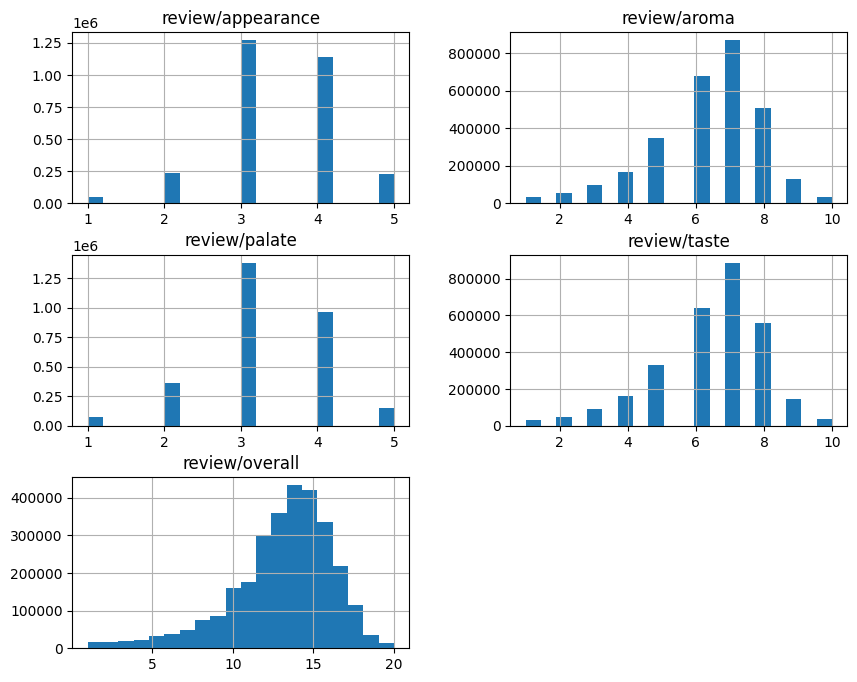

In [6]:
# Step 3: Ratings Analysis
# Convert rating columns to numeric values if they are not already
rating_columns = ['review/appearance', 'review/aroma', 'review/palate', 'review/taste', 'review/overall']
for column in rating_columns:
    data[column] = pd.to_numeric(data[column].str.split('/').str[0], errors='coerce')

# Analyze distributions of ratings
rating_distributions = data[rating_columns].hist(figsize=(10, 8), bins=20)

# Compute correlations between individual ratings and overall rating
correlations = data[rating_columns].corr()['review/overall'].drop('review/overall')

# Display the correlations
print("\nCorrelations Between Individual Ratings and Overall Rating:\n", correlations)

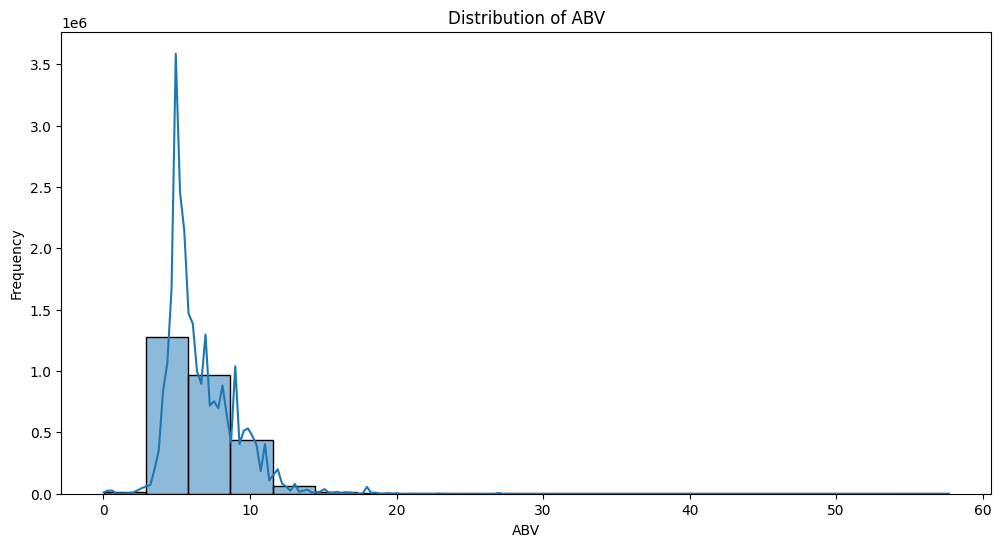

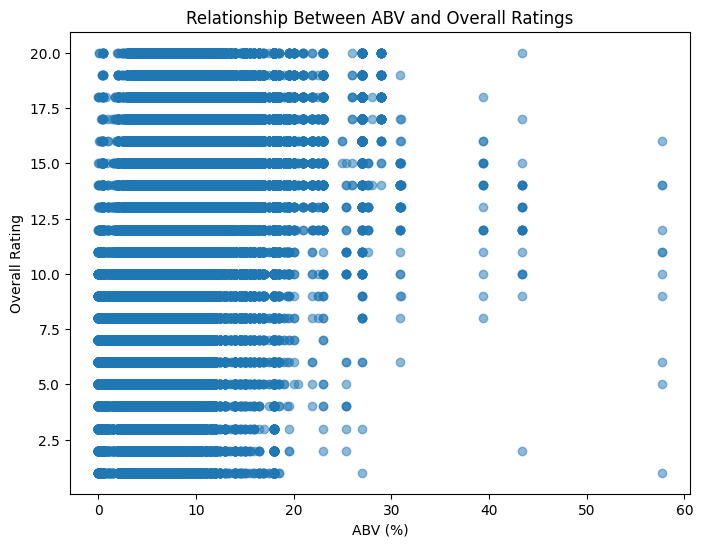


Most Common Beer Styles:
 beer/style
India Pale Ale &#40;IPA&#41;    185953
Pale Lager                      145618
Belgian Strong Ale              123946
Imperial Stout                  122223
Imperial/Double IPA             105672
Name: count, dtype: int64

Average Ratings by Beer Style:
 beer/style
Sak - Koshu            16.068966
Imperial Stout         15.854144
Ice Cider/Perry        15.807545
Abt/Quadrupel          15.669900
Imperial/Double IPA    15.457046
Name: review/overall, dtype: float64


In [7]:
data['beer/ABV'] = pd.to_numeric(data['beer/ABV'], errors='coerce')

# Step 4: Exploration by Category
# Most common beer styles and their average ratings
style_counts = data['beer/style'].value_counts()
style_avg_ratings = data.groupby('beer/style')['review/overall'].mean().sort_values(ascending=False)

# ABV analysis
plt.figure(figsize=(12, 6))
sns.histplot(data['beer/ABV'].dropna(), bins=20, kde=True)
plt.title('Distribution of ABV')
plt.xlabel('ABV')
plt.ylabel('Frequency')
plt.show()

# Relationship between ABV and overall ratings
plt.figure(figsize=(8, 6))
plt.scatter(data['beer/ABV'], data['review/overall'], alpha=0.5)
plt.title('Relationship Between ABV and Overall Ratings')
plt.xlabel('ABV (%)')
plt.ylabel('Overall Rating')
plt.show()

# Display the most common styles and their average ratings
print("\nMost Common Beer Styles:\n", style_counts.head())
print("\nAverage Ratings by Beer Style:\n", style_avg_ratings.head())

In [8]:
# User activity analysis
user_activity = data['review/profileName'].value_counts()
print(user_activity.head())

# User behavior analysis
user_review_counts = data['review/profileName'].value_counts()
print("User Review Counts:", user_review_counts.describe())

review/profileName
fonefan     16364
Ungstrup    15296
Papsoe      14170
yespr       13486
oh6gdx       9994
Name: count, dtype: int64
User Review Counts: count    29265.000000
mean        99.920144
std        465.198061
min          1.000000
25%          1.000000
50%          3.000000
75%         16.000000
max      16364.000000
Name: count, dtype: float64


In [9]:
# Item popularity analysis
item_popularity = data['beer/name'].value_counts()
print(item_popularity.head())

beer/name
Guinness Draught                           3696
Pabst Blue Ribbon                          3662
Dogfish Head 90 Minute Imperial IPA        3230
Budweiser                                  3126
Sierra Nevada Pale Ale &#40;Bottle&#41;    3119
Name: count, dtype: int64


In [10]:
# Sparsity check
num_users = data['review/profileName'].nunique()
num_items = data['beer/name'].nunique()
sparsity = 1 - len(data) / (num_users * num_items)
print(f"Data sparsity: {sparsity:.2%}")

Data sparsity: 99.91%


/tmp/ipykernel_11912/1869481480.py:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  data['review/time'] = pd.to_datetime(data['review/time'], unit='s')


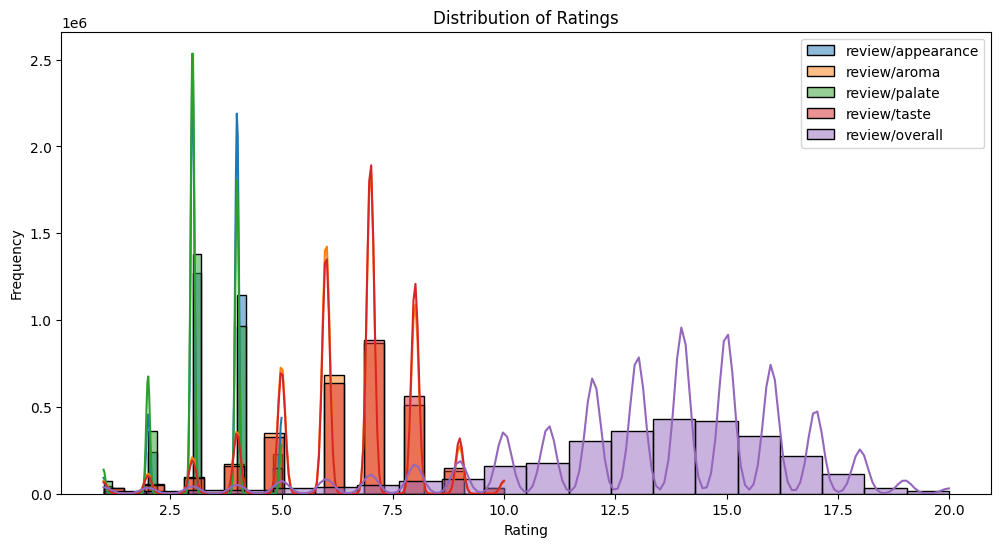

In [11]:
# Convert review time to datetime
data['review/time'] = pd.to_datetime(data['review/time'], unit='s')

# Analyze rating distributions
plt.figure(figsize=(12, 6))
for col in rating_columns:
    sns.histplot(data[col], bins=20, kde=True, label=col)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()

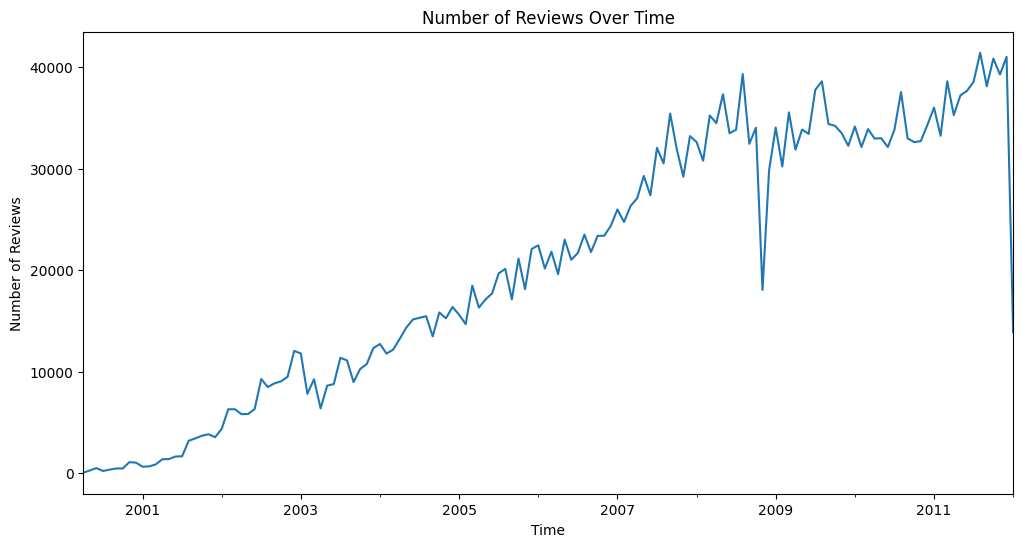

In [12]:
# Temporal analysis
plt.figure(figsize=(12, 6))
data['review/time'].dt.to_period('M').value_counts().sort_index().plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Reviews')
plt.show()

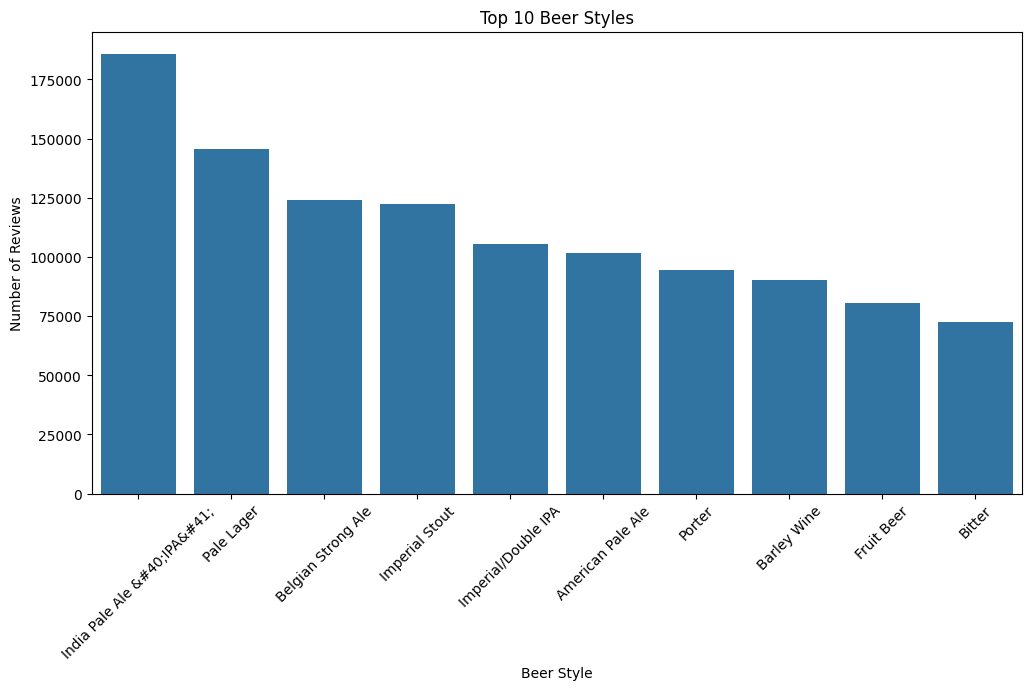

In [13]:
# Beer style analysis
top_styles = data['beer/style'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_styles.index, y=top_styles.values)
plt.xticks(rotation=45)
plt.title('Top 10 Beer Styles')
plt.xlabel('Beer Style')
plt.ylabel('Number of Reviews')
plt.show()

In [14]:
# Brewery analysis
top_breweries = data['beer/brewerId'].value_counts().head(10)
print("Top Breweries by Number of Reviews:", top_breweries)

Top Breweries by Number of Reviews: beer/brewerId
32      46566
76      38663
198     37364
96      35151
232     32433
84      32418
67      31823
15      25159
75      24573
7043    22841
Name: count, dtype: int64


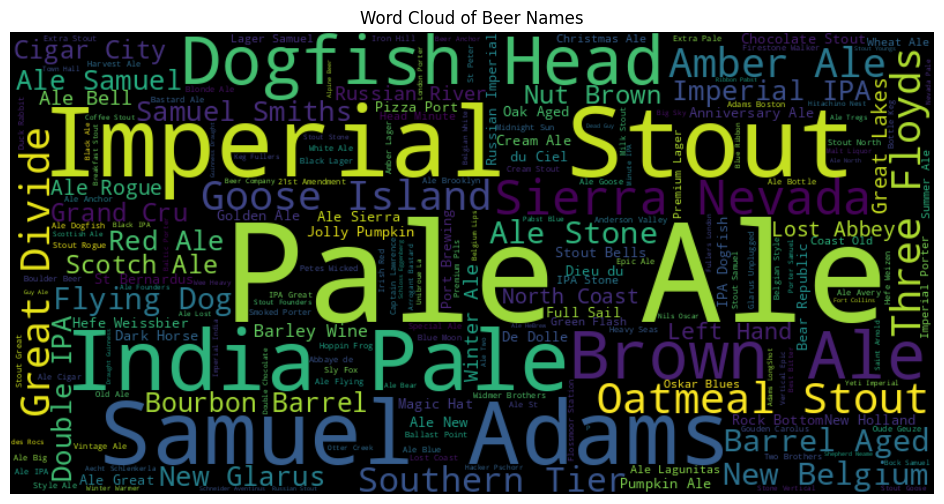

In [15]:
# Text analysis (Word Cloud for beer names)
text = ' '.join(data['beer/name'].astype(str))
wordcloud = WordCloud(width=800, height=400).generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Beer Names')
plt.show()

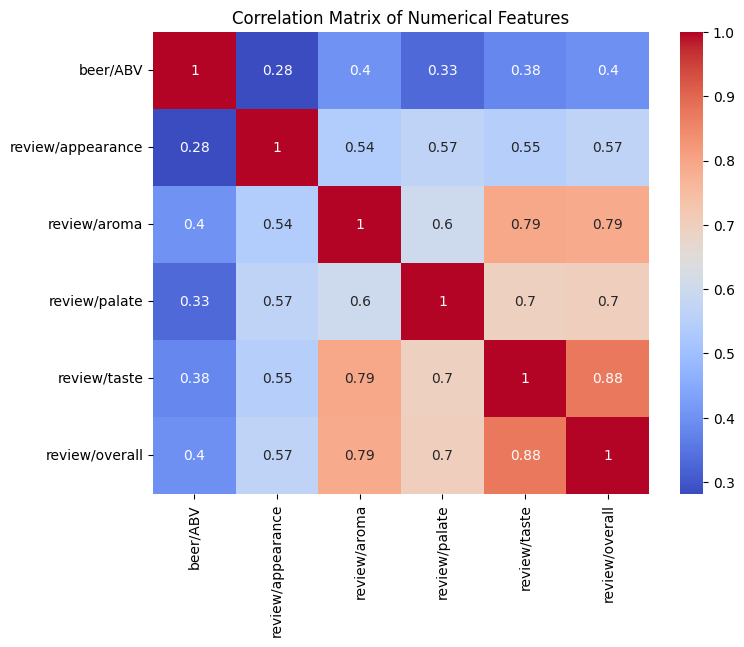

In [16]:
# Correlation analysis
corr = data[['beer/ABV'] + rating_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [28]:
# beer_styles = list(data['beer/style'].unique())
beer_styles_dist = data['beer/style'].value_counts(normalize=True)
data['beer/style_dist'] = data['beer/style'].map(beer_styles_dist)
data['beer/style_dist']

0          0.063592
1          0.063592
2          0.005977
3          0.005985
4          0.005985
             ...   
2924159    0.023576
2924160    0.023576
2924161    0.023576
2924162    0.023576
2924163         NaN
Name: beer/style_dist, Length: 2924164, dtype: float64

In [29]:
data['beer/style_dist_wt'] = data['beer/style'].map(beer_styles_dist) * data['beer/style'].map(style_avg_ratings)
data['beer/style_dist_wt']

0          0.911469
1          0.911469
2          0.074500
3          0.070875
4          0.070875
             ...   
2924159    0.306624
2924160    0.306624
2924161    0.306624
2924162    0.306624
2924163         NaN
Name: beer/style_dist_wt, Length: 2924164, dtype: float64

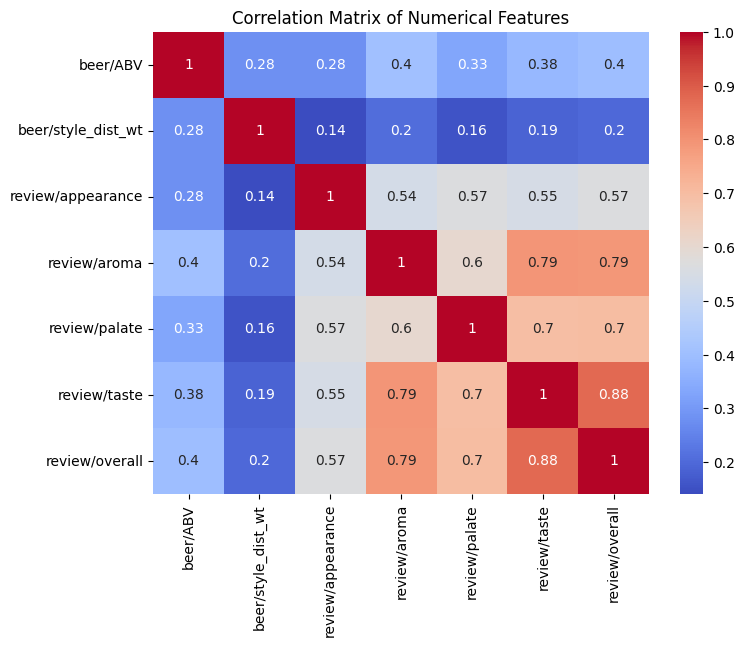

In [31]:
# New Correlation analysis
corr = data[['beer/ABV'] + ['beer/style_dist_wt'] + rating_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [32]:
style_avg_ratings

beer/style
Sak - Koshu            16.068966
Imperial Stout         15.854144
Ice Cider/Perry        15.807545
Abt/Quadrupel          15.669900
Imperial/Double IPA    15.457046
                         ...    
American Dark Lager    10.546284
Sak - Futsu-shu         9.330961
Pale Lager              7.472915
Malt Liquor             6.665953
Low Alcohol             6.302143
Name: review/overall, Length: 89, dtype: float64